In [16]:
# solving non linear poisson equation using bvp's

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

# define the equation
def q(x):
    return x**2

# define the boundary conditions
alpha = 0
beta = 0

# define the domain
a = 0
b = 1

# define the number of grid points
N = 100

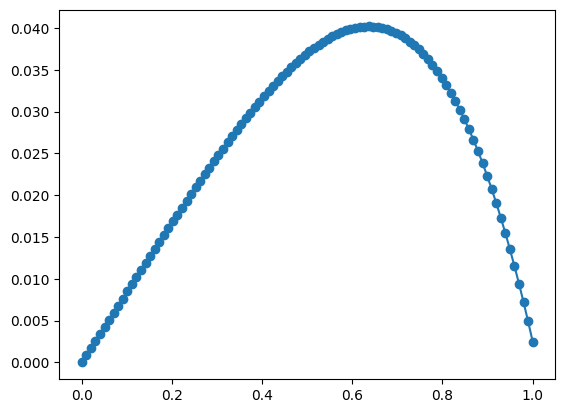

In [17]:
# discretise the domain
xi = np.linspace(a, b, N)

# solve using scipy root - f(u) = 0
def f(u, dx,N, q, alpha, beta):
    f_1 = (u[2] - 2*u[1] + alpha)/dx**2 + q(xi[1])
    f_i = (u[2:N] - 2*u[1:N-1] + u[:N-2])/dx**2 + q(xi[1:N-1])
    f_N1 = (beta - 2*u[N-1] + u[N-2])/dx**2 + q(xi[N-1])

    return np.concatenate(([f_1], f_i[:], [f_N1]))


dx = (b - a)/N
# initial guess
u = np.zeros(N)

sol = root(f, u, args=(dx,N, q, alpha, beta))

# separate the solution
u = sol.x

# plot the solution
plt.plot(xi, u, 'o-')
plt.show()


